In [4]:
import time
from sklearn.pipeline import make_pipeline
time_start = time.time()
import re
import os
import numpy as np
import scipy as sp
import mne
import pickle as pkl
import nilearn.plotting as nplt
import nilearn.image as image
import pickle
from mne.preprocessing import (ICA, create_eog_epochs, create_ecg_epochs, corrmap)
from sklearn.metrics import roc_auc_score
from nodestimation.node_estimate import Node, eigencentrality
from nodestimation.timewindow import TimeWindow, sliding_window
import nibabel as nib
import matplotlib.pyplot as plt
import nodestimation.project.path as path
from nodestimation.project.subject import Subject
from nodestimation.project.path import  find_subject_dir
from nodestimation.pipeline import pipeline
from sklearn.model_selection import train_test_split
import sklearn.metrics as sm
import pandas as pd
import matplotlib.pyplot as plt
from nodestimation.project.actions import read
from nodestimation.mlearning.features import prepare_data
import nodestimation as nd
from nodestimation.project.structures import subject_data_types

subjects = pipeline(methods=['coh', 'cohy', 'imcoh', 'plv', 'ciplv', 'ppc', 'pli', 'pli2_unbiased', 'wpli', 'wpli2_debiased', 'psd', 'envelope', 'pearson'],
                    freq_bands=[(0.5, 4), (4, 7), (7, 14), (14, 30), (30, 70)])

All computation has been already done, loading of the existing file with the solution...


In [34]:
feat = read['feat']('Source/Subjects/B1C2/d05014a7d0448bcfb88e555f115caaee/B1C2_node_estimation_pipeline_file_features_computation_output_feat.pkl')
pearson = feat['time-domain']['pearson']

print('sp.linalg.eigvals:')
print(sp.linalg.eigvals(pearson))

strength = list()
for row in pearson:
    strength.append(np.sum(row))

# print('strength:')
# print(np.array(strength))

print('np.linalg.eigvals:')
print(np.linalg.eigvals(pearson))

sp.linalg.eigvals:
[20.24309641+0.j  3.52604541+0.j  3.31271741+0.j  2.20442547+0.j
  1.97361024+0.j  1.64241188+0.j  1.383337  +0.j  1.01594249+0.j
  0.75097587+0.j  0.56881303+0.j  0.53825901+0.j  0.31650913+0.j
  0.32770788+0.j  0.26777246+0.j  0.14512868+0.j  0.03782517+0.j
 -0.02399028+0.j -0.08802582+0.j -0.14374389+0.j -0.20176886+0.j
 -0.26000573+0.j -0.31204626+0.j -0.39789515+0.j -0.42402085+0.j
 -0.45183765+0.j -0.48114305+0.j -0.53902287+0.j -0.55526037+0.j
 -0.57673328+0.j -0.62425349+0.j -0.64746584+0.j -0.65468053+0.j
 -0.67236431+0.j -0.7179779 +0.j -0.73728938+0.j -0.75106895+0.j
 -0.7713875 +0.j -0.7812294 +0.j -0.78367868+0.j -0.80461579+0.j
 -0.81610081+0.j -0.82837291+0.j -0.84818529+0.j -0.86336309+0.j
 -0.86680934+0.j -0.87353612+0.j -0.88152675+0.j -0.89590001+0.j
 -0.98787133+0.j -0.98490715+0.j -0.98004005+0.j -0.97265927+0.j
 -0.97069002+0.j -0.96958515+0.j -0.96400437+0.j -0.96379744+0.j
 -0.90755262+0.j -0.90971964+0.j -0.95524045+0.j -0.95224224+0.j
 -0.94

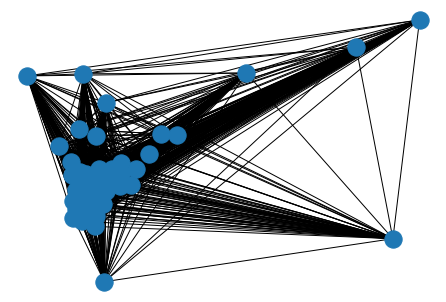

0.022399790626735683
0.02123795315302617
0.15461020812135648
0.14841980015336712
0.09067677051889915
0.07283352192089007
0.1257345366260449
0.1243699827966754
0.14054463161392963
0.16676939088950507
0.15086742565451808
0.12912587232969164
0.17560093481940042
0.18439267484291552
0.00866867715357167
0.11060822919742513
0.17746071524706938
0.153195285652007
0.19126517000376547
0.16056222444127832
0.14799485473208443
0.12116965121213995
0.09552057394491668
0.09592897169722936
0.15477325804451356
0.17485424329609914
0.1737646528766807
0.161069433898987
0.004057055654370618
0.039121897199727494
0.00608036177310023
0.021119008255435157
0.14666641821605292
0.1250543144770474
0.1670235228754323
0.1622936468823131
-0.005961094890906849
-0.046592722346387457
0.14376383838703785
0.15761242050469954
0.14305797534394984
0.14878004915629536
0.10678181057218263
0.06912057451638318
0.07100593093652181
0.07110668447862926
0.146803222400754
0.1381351347156306
0.12329884442478528
0.022728583822817814
0.10

In [36]:
import networkx as nx

G = nx.from_numpy_matrix(pearson)
nx.draw(G)
plt.show()
ec = nx.eigenvector_centrality_numpy(G, weight='weight')
for e in ec:
    print(ec[e])

In [ ]:
print(subjects[0].nodes[0].features.keys())
print(subjects[0].nodes[0].features['0.5-4Hz'].keys())
print(subjects[0].nodes[0].features['time-domain'].keys())

In [7]:
print(subjects[0].nodes[0].features)
print(subjects[0].nodes[1].features)
print(subjects[0].nodes[2].features)

{'0.5-4Hz': {'coh': -1.317363485577068, 'imcoh': -1.3394734727204665, 'plv': -2.0528235875580663, 'ciplv': -1.5525562836199378, 'ppc': -1.678543701052078, 'pli': -1.6399054623725264, 'psd': 36.43435844120942}, '4-7Hz': {'coh': -1.3642047636778902, 'imcoh': -1.0023628028600178, 'plv': -2.284270829462227, 'ciplv': -0.8920533966697122, 'ppc': -1.8255463624718395, 'pli': -1.1359849016943082, 'psd': 29.832568642664928}, '7-14Hz': {'coh': -1.3239278298736006, 'imcoh': -0.8657717860812277, 'plv': -2.3112786450743776, 'ciplv': -0.7436323127248022, 'ppc': -1.8821620195385906, 'pli': -0.9687787276170354, 'psd': 50.98730836305875}, '14-30Hz': {'coh': -1.2904217457516134, 'imcoh': -0.8168531814726282, 'plv': -2.283747717428443, 'ciplv': -0.6243336761910843, 'ppc': -1.941641352449933, 'pli': -0.8212089575771051, 'psd': 30.677948564482378}, 'time-domain': {'pearson': -0.9878713299550234, 'envelope': -0.477310852682067}}
{'0.5-4Hz': {'coh': -1.1454248655967996, 'imcoh': -0.9750095919240707, 'plv': -1

In [2]:
print(subjects[0].nodes[0].features)
print(subjects[0].nodes[1].features)
print(subjects[0].nodes[2].features)

{'0.5-4Hz': {'coh': -1.317363485577068, 'imcoh': -1.3394734727204665, 'plv': -2.0528235875580663, 'ciplv': -1.5525562836199378, 'ppc': -1.678543701052078, 'pli': -1.6399054623725264, 'psd': 36.43435844120942, 'envelope': -0.477310852682067}, '4-7Hz': {'coh': -1.3642047636778902, 'imcoh': -1.0023628028600178, 'plv': -2.284270829462227, 'ciplv': -0.8920533966697122, 'ppc': -1.8255463624718395, 'pli': -1.1359849016943082, 'psd': 29.832568642664928, 'envelope': -0.477310852682067}, '7-14Hz': {'coh': -1.3239278298736006, 'imcoh': -0.8657717860812277, 'plv': -2.3112786450743776, 'ciplv': -0.7436323127248022, 'ppc': -1.8821620195385906, 'pli': -0.9687787276170354, 'psd': 50.98730836305875, 'envelope': -0.477310852682067}, '14-30Hz': {'coh': -1.2904217457516134, 'imcoh': -0.8168531814726282, 'plv': -2.283747717428443, 'ciplv': -0.6243336761910843, 'ppc': -1.941641352449933, 'pli': -0.8212089575771051, 'psd': 30.677948564482378, 'envelope': -0.477310852682067}}
{'0.5-4Hz': {'coh': -1.1454248655

In [ ]:
subjects = pipeline(con_method=['coh', 'imcoh', 'plv', 'ciplv', 'ppc', 'pli'],
                    freq_diaps=[(0.5, 4), (4, 7), (7, 14), (14, 30), (30, 70)])
psd = subjects[0].nodes[0].features['4-7Hz']['psd']
plt.plot(psd)
plt.show()
psd = nd.mlearning.features.iterp_for_psd(psd, 68)
plt.plot(psd)
plt.show()

In [ ]:
# x_train, x_test, y_train, y_test = train_test_split(a['B1C2']['X'], a['B1C2']['Y'])
# from sklearn.svm import SVR
# from sklearn.pipeline import make_pipeline
# from sklearn.preprocessing import StandardScaler
#
# regr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
# regr.fit(x_train, y_train)
# y_pred = regr.predict(x_test)
#
# print(y_pred)
# print()
# print(y_test)

In [ ]:
from nodestimation.mlearning.features import prepare_connectivity, prepare_data
con = pkl.load(open(subjects[0].data['con'], 'rb'))

In [ ]:
# fig, ax = plt.subplots()
# ax.plot(psd['0.5-4Hz']['bankssts-lh']['freq'], psd['0.5-4Hz']['bankssts-lh']['psd'].mean(axis=0))
# # ax.set_xlabel('Freq (Hz)')
# ax.set_xlim(psd['0.5-4Hz']['bankssts-lh']['freq'][[0, -1]])
# ax.set_ylabel('Power Spectral Density')

In [ ]:
subjects_dir, subjects_ = find_subject_dir()
labels = mne.read_labels_from_annot('B1C2', parc='aparc', subjects_dir=subjects_dir)
label_names = [label.name for label in labels]
lh_labels = [name for name in label_names if name.endswith('lh')]
rh_labels = [name for name in label_names if name.endswith('rh')]

label_ypos_lh = list()

for name in lh_labels:
    idx = label_names.index(name)
    ypos = np.mean(labels[idx].pos[:, 1])
    label_ypos_lh.append(ypos)

try:
    idx = label_names.index('Brain-Stem')

except ValueError:
    pass

else:
    ypos = np.mean(labels[idx].pos[:, 1])
    lh_labels.append('Brain-Stem')
    label_ypos_lh.append(ypos)


lh_labels = [label for (yp, label) in sorted(zip(label_ypos_lh, lh_labels))]

rh_labels = [label[:-2] + 'rh' for label in lh_labels
             if label != 'Brain-Stem' and label[:-2] + 'rh' in rh_labels]


node_colors = [label.color for label in labels]

node_order = lh_labels[::-1] + rh_labels

node_angles = mne.viz.circular_layout(label_names, node_order, start_pos=90,
                              group_boundaries=[0, len(label_names) // 2])

In [ ]:
methods = [
    'coh',
    'imcoh',
    'plv',
    'ciplv',
    'ppc',
    'pli'
]

freq_bands = [
    '0.5-4Hz',
    '4-7Hz',
    '7-14Hz',
    '14-30Hz'
]

for method in methods:
    for freq_band in freq_bands:
        fig = plt.figure(num=None, figsize=(25, 25), facecolor='black')
        mne.viz.plot_connectivity_circle(con[freq_band][method]['con'][:, :, 0], label_names, n_lines=300,
                                         node_angles=node_angles, node_colors=node_colors,
                                         title='All-to-All Connectivity Epilepsy Condition ({} for {})'
                                         .format(method, freq_band), padding=8, fontsize_title=35, fontsize_colorbar=25,
                                         fontsize_names=20, fig=fig
                                         )

In [ ]:
raw = read['raw'](subjects[0].data['raw_fp'])
eve = read['eve'](subjects[0].data['eve'])
epo = read['epo'](subjects[0].data['epo'])
ave = read['ave'](subjects[0].data['ave'])
inv = read['inv'](subjects[0].data['inv'])

raw.plot(events=eve, color='gray',
         event_color={1: 'r'})

In [ ]:
ave[0].plot()

In [ ]:
epo.plot()

In [ ]:
epo.plot_psd()

In [ ]:
epo.plot_image()

In [ ]:
stc = read['stc'](subjects[0].data['stc'])

In [ ]:
src = read['src'](subjects[0].data['src'][0])

In [ ]:
label_ts = mne.extract_label_time_course(stc, labels, src, mode='mean_flip')

In [ ]:
plt.plot(label_ts[0][0])
plt.show()
plt.plot(label_ts[1][0])
plt.show()
plt.plot(label_ts[2][0])
plt.show()
plt.plot(label_ts[3][0])
plt.show()

In [ ]:
for c in con['0.5-4Hz']['plv']['con'][:,:,0]:
    print(c[0:5])
print('2:3 ', con['0.5-4Hz']['plv']['con'][3,2,0])

plt.imshow(con['0.5-4Hz']['plv']['con'][:,:,0] + con['0.5-4Hz']['plv']['con'][:,:,0].T)
plt.show()
plt.plot(np.arange(401), label_ts[0][2].T, np.arange(401), label_ts[0][3].T)
plt.show()
plt.plot(np.arange(401), label_ts[1][2].T, np.arange(401), label_ts[1][3].T)
plt.show()
plt.plot(np.arange(401), label_ts[2][2].T, np.arange(401), label_ts[2][3].T)
plt.show()
plt.plot(np.arange(401), label_ts[3][2].T, np.arange(401), label_ts[3][3].T)
plt.show()

In [ ]:
print('0:11 ', con['0.5-4Hz']['plv']['con'][11,0,0])

plt.plot(np.arange(401), label_ts[0][11].T, np.arange(401), label_ts[0][0].T)
plt.show()
plt.plot(np.arange(401), label_ts[1][11].T, np.arange(401), label_ts[1][0].T)
plt.show()
plt.plot(np.arange(401), label_ts[2][11].T, np.arange(401), label_ts[2][0].T)
plt.show()
plt.plot(np.arange(401), label_ts[3][11].T, np.arange(401), label_ts[3][0].T)
plt.show()